<a href="https://colab.research.google.com/github/sainiankur63/Master_Modular_project/blob/main/First_Model_Acurracy_87_95_per.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Important Steps** <br>
**1) Removing Outliers**

1.   PRICE : In between ( 100 USD and 60k USD )
2.   YEAR : taking year greater than 1994.5
3.   ODOMETER : In between ( 100 miles and 200000 miles)

**2) Drop Columns** <br> 
[ 'id' , 'url', 'region' , 'region_url ', 'VIN' , 'image_url' , 'description' , 'county' , 'state' , 'model' , 'lat' , 'long' ,  'posting_date' ]

**3) Null Values**


1. df['transmission'] = df['transmission'].fillna(df.transmission.mode()[0])
2. df['fuel'] = df['fuel'].fillna(df.fuel.mode()[0]) 
3. df['title_status'] = df['title_status'].fillna(df['title_status'].mode()[0])
4. df['manufacturer'] = df['manufacturer'].fillna(df['manufacturer'].mode()[0])
5. df['condition'] = df['condition'].fillna(df['condition'].mode()[0])
6. df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mode()[0])
7. df['drive'] = df['drive'].fillna(df['drive'].mode()[0])
8. df['type'] = df['type'].fillna(df['type'].mode()[0])
9. df['paint_color'] = df['paint_color'].fillna(df['paint_color'].mode()[0])

**4) Normalizaton**
1.   Standard Scalar
2.   Min Max Scalar

**5) Model Outcome**

1.   Random Forest :
                    n_estimators : 300
                    Model Score: 0.8795253332237268
                    Mean Absolute Error: 2102.0
                    Mean Squared Error: 20169880.59
                    Root Mean Squared Error: 4491.09
2.   Multi Linear Regression :
                    Model Score: 0.5369479343200012  
                    Mean Absolute Error: 6489.38
                    Mean Squared Error: 77524222.51
                    Root Mean Squared Error: 8804.78  
  




In [1]:
!pip install pandas numpy pandas matplotlib seaborn opendatasets --quiet

In [2]:
!pip install imbalanced-learn

In [3]:
# To show all columns' names on a large pandas dataframe
import pandas as pd
pd.set_option('display.max_columns', None)

In [4]:
import pandas as pd
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (8,4)

In [5]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/austinreese/craigslist-carstrucks-data'


od.download(dataset_url)

data_dir = './craigslist-carstrucks-data'

Skipping, found downloaded files in "./craigslist-carstrucks-data" (use force=True to force download)


In [6]:
df = pd.read_csv(data_dir+"/vehicles.csv")

### **Checking outliers for each labels Outlier Detection**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

### **First Checking Outliers for Numeric data columns** <br>
Numeric columns : [ price ,year , odometer , lat , long ] <br>




In [8]:
df.describe().applymap(lambda x: f"{x:0.3f}")

,id,price,year,odometer,county,lat,long
count,426880.000,426880.000,425675.000,422480.000,0.000,420331.000,420331.000
mean,7311486634.224,75199.033,2011.235,98043.331,nan,38.494,-94.749
std,4473170.413,12182282.174,9.452,213881.501,nan,5.842,18.365
min,7207408119.000,0.000,1900.000,0.000,nan,-84.122,-159.828
25%,7308143339.250,5900.000,2008.000,37704.000,nan,34.602,-111.940
50%,7312620821.000,13950.000,2013.000,85548.000,nan,39.150,-88.433
75%,7315253543.500,26485.750,2017.000,133542.500,nan,42.399,-80.832
max,7317101084.000,3736928711.000,2022.000,10000000.000,nan,82.391,173.886


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


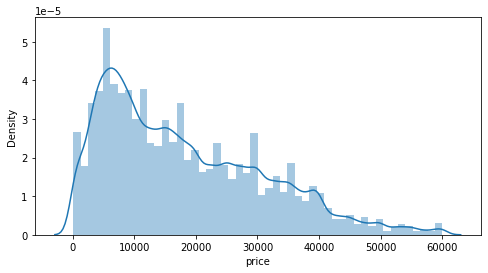

In [9]:
sns.distplot(df[(df.price >=  100) & (df.price <= 60000)].price)

In [10]:
df[(df.price >= 60000)].shape

(6320, 26)

In [11]:
# Outlier removal in price column

#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.price.quantile(0.75)-df.price.quantile(0.25)

#### Extreme outliers
lower_lim_price = df['price'].quantile(0.25)-(IQR*3)
upper_lim_price = df['price'].quantile(0.75)+(IQR*3)
print(lower_lim_price), print(upper_lim_price)

-55857.25
88243.0


(None, None)

In [12]:
lower_lim = df['price'].quantile(0.25)-(IQR*1.5)
upper_lim = df['price'].quantile(0.75)+(IQR*1.5)
print(lower_lim), print(upper_lim)

-24978.625
57364.375


(None, None)

In [13]:
# Taking 100 dollars as min and 60k dollars max value for price

df = df[(df.price >=  100) & (df.price <= 60000)]

In [14]:
df.shape

(384392, 26)

In [15]:
# Outlier removal in year column

df['year'].isnull().sum()

1018

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


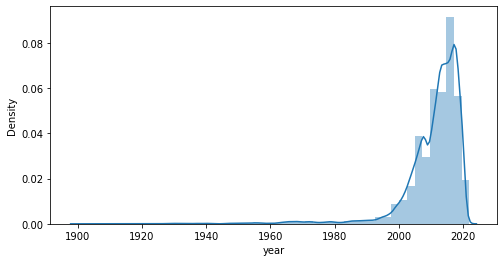

In [16]:
# checking the distribution of year column
import seaborn as sns

sns.distplot(df['year'].dropna())

**Observation:**
1. Data is left Skewed

In [17]:
#import seaborn as sns
#sns.boxplot(df['year'])

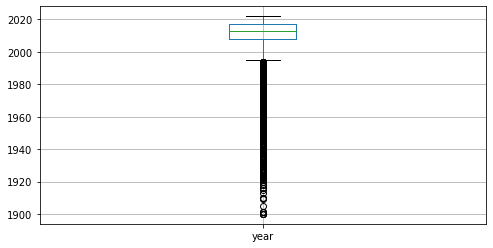

In [18]:
import seaborn as sns
figure=df.boxplot(column="year")

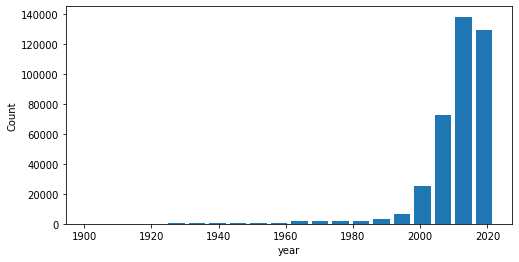

In [19]:
# Histogram for year column

plt.hist(df.year, bins=20, rwidth=0.8)
plt.xlabel('year')
plt.ylabel('Count')
plt.show()

In [20]:
df['year'].describe()

count    383374.000000
mean       2010.955506
std           9.504683
min        1900.000000
25%        2008.000000
50%        2013.000000
75%        2017.000000
max        2022.000000
Name: year, dtype: float64

As per the above graphs it is clearly shows that data of year is left skewed. 
For skewed Data , IQR techniqie is implement to remove outliers

In [21]:
#### Lets compute the Interquantile range to calculate the boundaries
IQR=df.year.quantile(0.75)-df.year.quantile(0.25)

In [22]:
lower_lim_year = df['year'].quantile(0.25)-(IQR*1.5)
upper_lim_year = df['year'].quantile(0.75)+(IQR*1.5)
print(lower_lim_year), print(upper_lim_year)

1994.5
2030.5


(None, None)

In [23]:
#### Extreme outliers
#lower_bridge=df['year'].quantile(0.25)-(IQR*3)
#upper_bridge=df['year'].quantile(0.75)+(IQR*3)
#print(lower_bridge), print(upper_bridge)

df.describe().applymap(lambda x: f"{x:0.3f}")

,id,price,year,odometer,county,lat,long
count,384392.000,384392.000,383374.000,382171.000,0.000,380930.000,380930.000
mean,7311481807.202,18095.776,2010.956,99475.075,nan,38.529,-94.354
std,4475633.430,13008.848,9.505,199702.266,nan,5.837,18.137
min,7207408119.000,100.000,1900.000,0.000,nan,-84.122,-159.720
25%,7308130373.250,7295.000,2008.000,39348.000,nan,34.736,-110.962
50%,7312630621.500,14999.000,2013.000,88706.000,nan,39.260,-88.001
75%,7315251517.000,26990.000,2017.000,136462.000,nan,42.364,-80.830
max,7317101084.000,60000.000,2022.000,10000000.000,nan,82.391,167.630


In [24]:
#Q1 = df.year.quantile(0.25)
#Q3 = df.year.quantile(0.75)
#Q1, Q3

In [25]:
#IQR = Q3 - Q1
#IQR

In [26]:
#lower_limit = Q1 - 1.5*IQR
#upper_limit = Q3 + 1.5*IQR
#lower_limit, upper_limit

In [27]:
df.shape

(384392, 26)

In [28]:
# Removing Outliers in year c

df = df[(df['year'] >= lower_lim_year)]

In [29]:
print("Shape of dataset after Outliers removal in YEAR column : ",len(df))

Shape of dataset after Outliers removal in YEAR column :  368395


**Outlier removal for odometer column**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


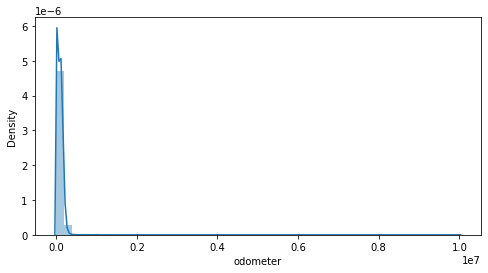

In [30]:
# checking the distribution of odometer column

import seaborn as sns

sns.distplot(df['odometer'].dropna())

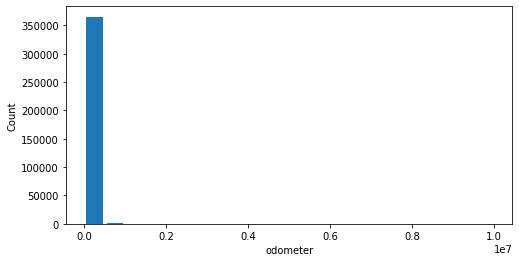

In [31]:
# creating boxplot for odometer column

plt.hist(df.odometer, bins=20, rwidth=0.8)      
plt.xlabel('odometer')
plt.ylabel('Count')
plt.show()

In [32]:
df.describe().applymap(lambda x: f"{x:0.3f}")

,id,price,year,odometer,county,lat,long
count,368395.000,368395.000,368395.000,366261.000,0.000,365028.000,365028.000
mean,7311472143.653,18261.588,2012.395,97375.126,nan,38.533,-94.252
std,4388921.829,12999.855,5.516,140460.904,nan,5.841,18.133
min,7301583321.000,100.000,1995.000,0.000,nan,-84.122,-159.720
25%,7308081190.000,7499.000,2009.000,39664.000,nan,34.756,-110.960
50%,7312585273.000,15500.000,2013.000,89364.000,nan,39.262,-87.923
75%,7315240234.000,26999.000,2017.000,137000.000,nan,42.370,-80.790
max,7317101084.000,60000.000,2022.000,10000000.000,nan,82.253,167.630


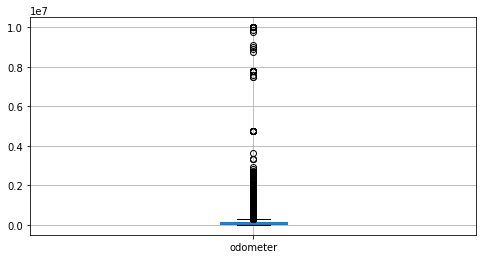

In [33]:
figure=df.boxplot(column="odometer")

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


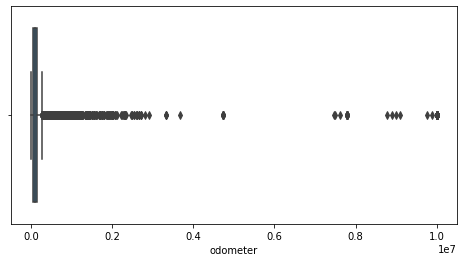

In [34]:
sns.boxplot(df['odometer'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


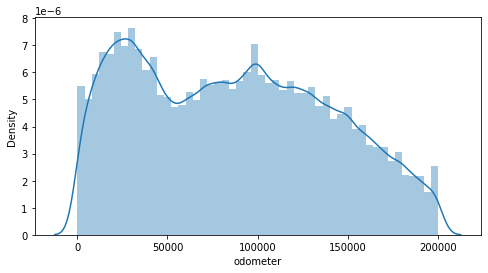

In [35]:
sns.distplot(df[(df.odometer >= 100) & (df.odometer <= 200000)].odometer)

In [36]:
df[df.odometer >= 250000].shape

(6148, 26)

Odometer data is right skewed as per the above graphs. To tackle this data , IQR techinique is implemented

In [37]:
lower_lim_odometer = df['odometer'].quantile(0.25)-(IQR*1.5)
upper_lim_odometer = df['odometer'].quantile(0.75)+(IQR*1.5)
print(lower_lim_odometer), print(upper_lim_odometer)

39650.5
137013.5


(None, None)

In [38]:
lower_lim_odometer = df['odometer'].quantile(0.25)-(IQR*3)
upper_lim_odometer = df['odometer'].quantile(0.75)+(IQR*3)
print(lower_lim_odometer), print(upper_lim_odometer)

39637.0
137027.0


(None, None)

In [39]:
# Removing Outliers in odometer

df = df[(df.odometer >= 100) & (df.odometer <= 200000)]

In [40]:
df.shape

(341611, 26)

In [41]:
# Removing Outliers in year c

#df = df[(df['odometer'] >= lower_lim_odometer) & (df['odometer'] <= upper_lim_odometer)]

In [42]:
df.odometer.max()

200000.0

In [43]:
print("Shape of dataset after Outliers removal in odometer column : ",len(df))

Shape of dataset after Outliers removal in odometer column :  341611


In [44]:
df.describe().applymap(lambda x: f"{x:0.3f}")

,id,price,year,odometer,county,lat,long
count,341611.000,341611.000,341611.000,341611.000,0.000,338441.000,338441.000
mean,7311450966.426,18853.202,2012.780,86555.824,nan,38.543,-94.159
std,4392101.721,12941.901,5.277,53354.199,nan,5.854,18.191
min,7301583321.000,100.000,1995.000,100.000,nan,-81.838,-159.720
25%,7308050543.500,7995.000,2010.000,38685.500,nan,34.758,-110.879
50%,7312519244.000,15999.000,2014.000,84837.000,nan,39.300,-87.846
75%,7315227342.000,27990.000,2017.000,128572.000,nan,42.379,-80.673
max,7317101084.000,60000.000,2022.000,200000.000,nan,80.680,167.630


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341611 entries, 27 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            341611 non-null  int64  
 1   url           341611 non-null  object 
 2   region        341611 non-null  object 
 3   region_url    341611 non-null  object 
 4   price         341611 non-null  int64  
 5   year          341611 non-null  float64
 6   manufacturer  331811 non-null  object 
 7   model         338906 non-null  object 
 8   condition     211094 non-null  object 
 9   cylinders     200574 non-null  object 
 10  fuel          339626 non-null  object 
 11  odometer      341611 non-null  float64
 12  title_status  335258 non-null  object 
 13  transmission  340290 non-null  object 
 14  VIN           221655 non-null  object 
 15  drive         237956 non-null  object 
 16  size          92122 non-null   object 
 17  type          273333 non-null  object 
 18  pai

**Exploratory Data Analysis (EDA)**

In Data Analysis What All Things We Do
1. Missing Values
2. Explore About the Numerical Variables
3. Explore About categorical Variables
4. Finding Relationship between features

In [46]:
df.shape

(341611, 26)

In [47]:
# features with null values

[features for features in df.columns if df[features].isnull().sum()>0]

['manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'description',
 'county',
 'lat',
 'long']

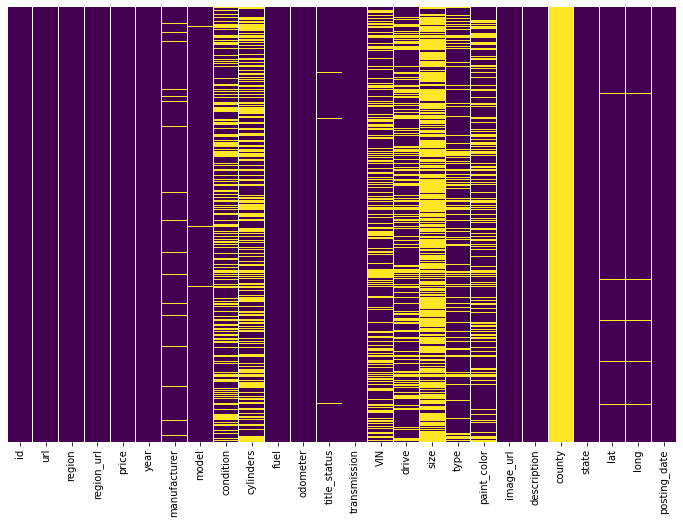

In [48]:
# creating a graph to check null values

plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Country column contains all null values , Drop the column



In [49]:
df['county'].isnull().sum()

341611

In [50]:
df.drop('county',axis =1 , inplace = True)

In [51]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 
missing_percentages[missing_percentages!=0]

size            0.730331
cylinders       0.412858
condition       0.382063
VIN             0.351148
drive           0.303430
paint_color     0.287971
type            0.199871
manufacturer    0.028688
title_status    0.018597
lat             0.009280
long            0.009280
model           0.007918
fuel            0.005811
transmission    0.003867
description     0.000006
dtype: float64

Text(0, 0.5, 'Features')

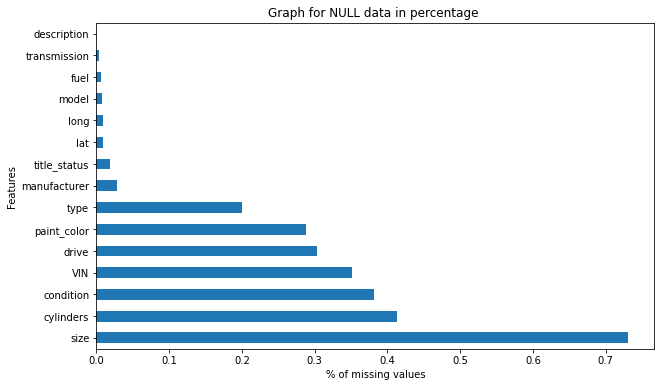

In [52]:
# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

**TRANSMISSION**

In [53]:
# transmission column

df['transmission'].isnull().sum()

1321

In [54]:
df['transmission'].value_counts()

automatic    265045
other         59841
manual        15404
Name: transmission, dtype: int64

In [55]:
df_group_one = df[['transmission','fuel','price']]
df_group_one = df_group_one.groupby(['transmission','fuel'],as_index=False).mean()
df_group_one

,transmission,fuel,price
0,automatic,diesel,33134.186041
1,automatic,electric,21486.991416
2,automatic,gas,15621.177856
3,automatic,hybrid,14079.988844
4,automatic,other,23142.589316
5,manual,diesel,24113.886831
6,manual,electric,9241.800000
7,manual,gas,13406.921083
8,manual,hybrid,17362.721311
9,manual,other,26301.443966


In [56]:
# Replacing null values in transmission column

df['transmission'] = df['transmission'].fillna(df.transmission.mode()[0])

In [57]:
print("Number of null values :" ,df.transmission.isnull().sum())
print(df.transmission.value_counts())

Number of null values : 0
automatic    266366
other         59841
manual        15404
Name: transmission, dtype: int64


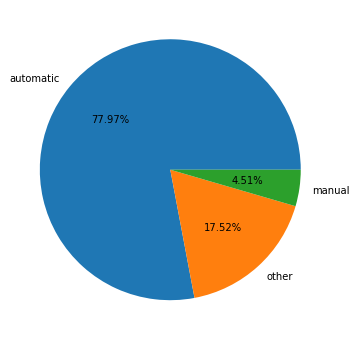

In [58]:
## Pie Chart for transmission column

plt.figure(figsize=(10,6))
plt.pie(df.transmission.value_counts().values,labels=df.transmission.value_counts().index,autopct='%1.2f%%')
plt.show()

In [59]:
# Transmission looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['transmission'] = LabelEncoding.fit_transform(df['transmission'])

In [60]:
df['transmission'].value_counts()

0    266366
2     59841
1     15404
Name: transmission, dtype: int64

Text(0, 0.5, 'Features')

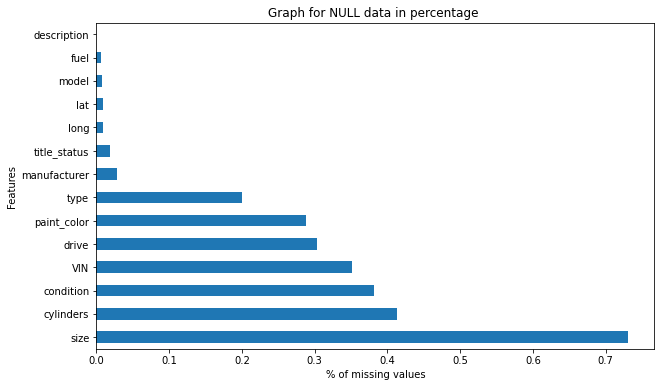

In [61]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 
missing_percentages[missing_percentages!=0]

# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

**FUEL**

In [62]:
df['fuel'].isnull().sum()

1985

In [63]:
df['fuel'].value_counts()

gas         289181
other        26368
diesel       18010
hybrid        4562
electric      1505
Name: fuel, dtype: int64

In [64]:
len (df[~ ((df['fuel'] == 'other') | (df['fuel'] == 'gas') | (df['fuel'] == 'diesel') | (df['fuel'] == 'hybrid') | (df['fuel'] == 'electric')) ])

1985

In [65]:
# Replacing null values in fuel column

df['fuel'] = df['fuel'].fillna(df.fuel.mode()[0])

In [66]:
print("Number of null values :" ,df.fuel.isnull().sum())
print(df.fuel.value_counts())

Number of null values : 0
gas         291166
other        26368
diesel       18010
hybrid        4562
electric      1505
Name: fuel, dtype: int64


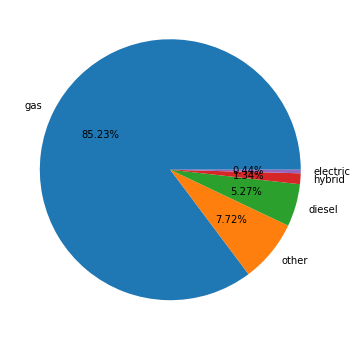

In [67]:
## Pie Chart for fuel column

plt.figure(figsize=(10,6))
plt.pie(df.fuel.value_counts().values,labels=df.fuel.value_counts().index,autopct='%1.2f%%')
plt.show()

In [68]:
# fuel looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['fuel'] = LabelEncoding.fit_transform(df['fuel'])

In [69]:
df['fuel'].value_counts()

2    291166
4     26368
0     18010
3      4562
1      1505
Name: fuel, dtype: int64

Text(0, 0.5, 'Features')

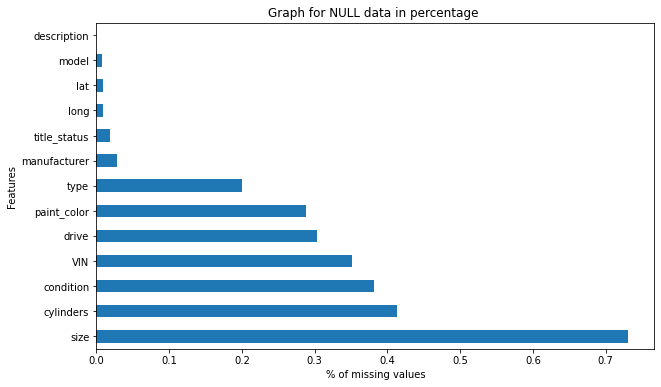

In [70]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 


# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

MODEL

In [71]:
df['model'].isnull().sum()

2705

In [72]:
len(df['model'].unique())

22166

Model column contains 15663 unique values , will drop this column for now

In [73]:
df.drop('model', axis=1 , inplace=True)

Text(0, 0.5, 'Features')

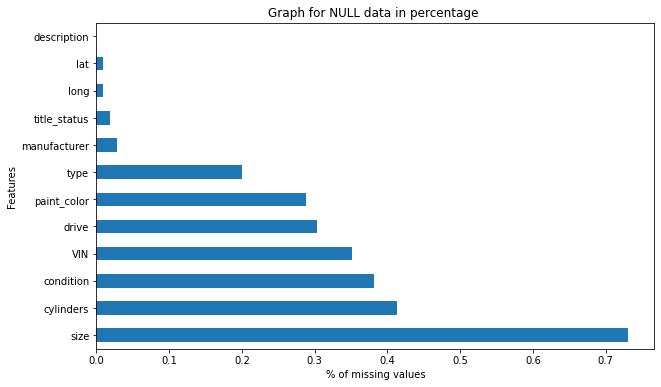

In [74]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 


# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

**Drop Unnecessary columns for now**
1. id
2. url
3. region
4. region_url
5. VIN
6. image_url
7. description
8. state
9. lat
10. long
11. posting_date


In [75]:
df.drop(['id','url','region','region_url','VIN','image_url','description','state','lat','long','posting_date'], axis =1 , inplace = True)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 341611 entries, 27 to 426879
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         341611 non-null  int64  
 1   year          341611 non-null  float64
 2   manufacturer  331811 non-null  object 
 3   condition     211094 non-null  object 
 4   cylinders     200574 non-null  object 
 5   fuel          341611 non-null  int64  
 6   odometer      341611 non-null  float64
 7   title_status  335258 non-null  object 
 8   transmission  341611 non-null  int64  
 9   drive         237956 non-null  object 
 10  size          92122 non-null   object 
 11  type          273333 non-null  object 
 12  paint_color   243237 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 36.5+ MB


Text(0, 0.5, 'Features')

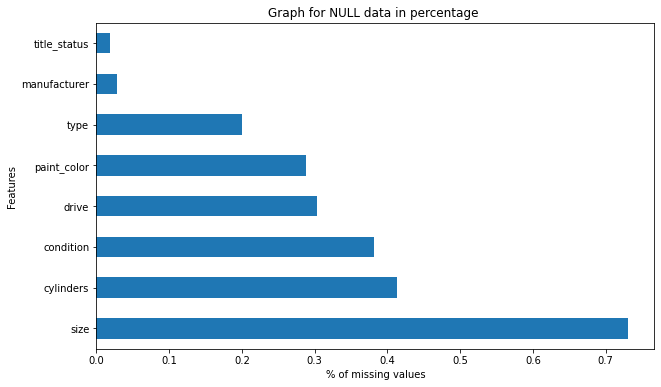

In [77]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 


# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

**title_status**

In [78]:
df['title_status'].isnull().sum()

6353

In [79]:
df['title_status'].value_counts()

clean         323809
rebuilt         6598
salvage         3317
lien            1255
missing          194
parts only        85
Name: title_status, dtype: int64

In [80]:
df['title_status'] = df['title_status'].fillna(df['title_status'].mode()[0])

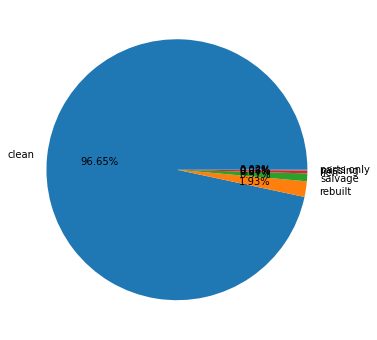

In [81]:
## Pie Chart for title_status column

plt.figure(figsize=(10,6))
plt.pie(df.title_status.value_counts().values,labels=df.title_status.value_counts().index,autopct='%1.2f%%')
plt.show()

In [82]:
# title_status looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['title_status'] = LabelEncoding.fit_transform(df['title_status'])

In [83]:
df['title_status'].value_counts()

0    330162
4      6598
5      3317
1      1255
2       194
3        85
Name: title_status, dtype: int64

Text(0, 0.5, 'Features')

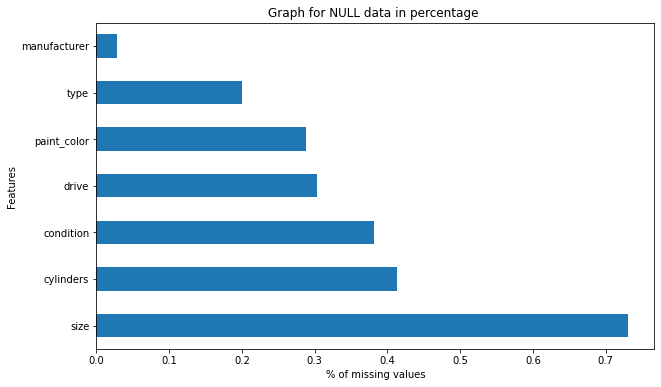

In [84]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 


# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

**manufacturer**

In [85]:
df['manufacturer'].isnull().sum()

9800

In [86]:
df['manufacturer'].value_counts()

ford               54458
chevrolet          41451
toyota             27435
honda              17606
nissan             16290
jeep               15734
ram                14181
bmw                13146
gmc                12908
dodge              10878
mercedes-benz       9190
hyundai             8987
subaru              8374
volkswagen          7948
kia                 7258
lexus               7203
audi                6822
cadillac            5808
acura               5353
chrysler            5212
mazda               4685
buick               4628
infiniti            4290
lincoln             3685
volvo               2836
mitsubishi          2785
mini                2209
rover               1766
jaguar              1702
pontiac             1606
porsche             1061
saturn               990
mercury              888
alfa-romeo           802
tesla                766
fiat                 729
harley-davidson      114
aston-martin          11
land rover            10
ferrari                4


In [87]:
df['manufacturer'] = df['manufacturer'].fillna(df['manufacturer'].mode()[0])

In [88]:
df['manufacturer'].unique()

array(['gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'buick', 'mercedes-benz', 'bmw',
       'mitsubishi', 'volkswagen', 'porsche', 'kia', 'rover', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'aston-martin', 'land rover', 'morgan', 'ferrari'], dtype=object)

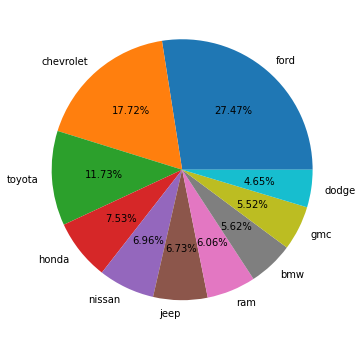

In [89]:
## Pie Chart for TOP 10 manufacturer column

plt.figure(figsize=(10,6))
plt.pie(df.manufacturer.value_counts()[:10].values,labels=df.manufacturer.value_counts()[:10].index,autopct='%1.2f%%')
plt.show()

### " **manufacturer** " is a **Nominal data**, 3 techniques to solve this:
1. ONE HOT ENCODING
2. ONE HOT ENCODING WITH MULTIPLE CATEGORIES
3. MEAN ENCODING

In [90]:
!pip install category_encoders --quiet

     |████████████████████████████████| 86 kB 3.1 MB/s 


In [91]:
# title_status looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['manufacturer'] = LabelEncoding.fit_transform(df['manufacturer'])


In [92]:
df

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
27,33590,2014.0,13,good,8 cylinders,2,57923.0,0,2,NaN,NaN,pickup,white
28,22590,2010.0,7,good,8 cylinders,2,71229.0,0,2,NaN,NaN,pickup,blue
29,39590,2020.0,7,good,8 cylinders,2,19160.0,0,2,NaN,NaN,pickup,red
30,30990,2017.0,38,good,8 cylinders,2,41124.0,0,2,NaN,NaN,pickup,red
31,15000,2013.0,12,excellent,6 cylinders,2,128000.0,0,0,rwd,full-size,truck,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,30,good,6 cylinders,2,32226.0,0,2,fwd,NaN,sedan,NaN
426876,30590,2020.0,40,good,NaN,2,12029.0,0,2,fwd,NaN,sedan,red
426877,34990,2020.0,6,good,NaN,0,4174.0,0,2,NaN,NaN,hatchback,white
426878,28990,2018.0,22,good,6 cylinders,2,30112.0,0,2,fwd,NaN,sedan,silver


In [93]:
df.columns

Index(['price', 'year', 'manufacturer', 'condition', 'cylinders', 'fuel',
       'odometer', 'title_status', 'transmission', 'drive', 'size', 'type',
       'paint_color'],
      dtype='object')

In [94]:
# Reset Index

df.reset_index(inplace = True)
df.drop('index',axis =1, inplace= True)

In [95]:
df

,price,year,manufacturer,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,33590,2014.0,13,good,8 cylinders,2,57923.0,0,2,NaN,NaN,pickup,white
1,22590,2010.0,7,good,8 cylinders,2,71229.0,0,2,NaN,NaN,pickup,blue
2,39590,2020.0,7,good,8 cylinders,2,19160.0,0,2,NaN,NaN,pickup,red
3,30990,2017.0,38,good,8 cylinders,2,41124.0,0,2,NaN,NaN,pickup,red
4,15000,2013.0,12,excellent,6 cylinders,2,128000.0,0,0,rwd,full-size,truck,black
...,...,...,...,...,...,...,...,...,...,...,...,...,...
341606,23590,2019.0,30,good,6 cylinders,2,32226.0,0,2,fwd,NaN,sedan,NaN
341607,30590,2020.0,40,good,NaN,2,12029.0,0,2,fwd,NaN,sedan,red
341608,34990,2020.0,6,good,NaN,0,4174.0,0,2,NaN,NaN,hatchback,white
341609,28990,2018.0,22,good,6 cylinders,2,30112.0,0,2,fwd,NaN,sedan,silver


**condition**



In [96]:
df['condition'].isnull().sum()

130517

In [97]:
df['condition'].value_counts()

good         106297
excellent     82311
like new      18085
fair           3373
new             657
salvage         371
Name: condition, dtype: int64

In [98]:
df_group_one = df[['condition','year']]
df_group_one = df_group_one.groupby(['condition','year'],as_index=False).count()
df_group_one

,condition,year
0,excellent,1995.0
1,excellent,1996.0
2,excellent,1997.0
3,excellent,1998.0
4,excellent,1999.0
...,...,...
161,salvage,2017.0
162,salvage,2018.0
163,salvage,2019.0
164,salvage,2020.0


In [99]:
df[df.condition == 'good'].year.value_counts()

2018.0    13986
2017.0    11298
2019.0    10123
2020.0     9738
2016.0     7853
2013.0     7106
2014.0     6369
2015.0     6269
2012.0     4921
2011.0     3929
2008.0     3214
2010.0     3114
2007.0     2747
2006.0     2593
2009.0     2486
2005.0     2072
2004.0     1844
2003.0     1494
2002.0     1203
2001.0      958
2000.0      752
1999.0      642
1998.0      481
1997.0      402
1995.0      292
1996.0      270
2021.0      139
2022.0        2
Name: year, dtype: int64

In [100]:
df['condition'] = df['condition'].fillna(df['condition'].mode()[0])

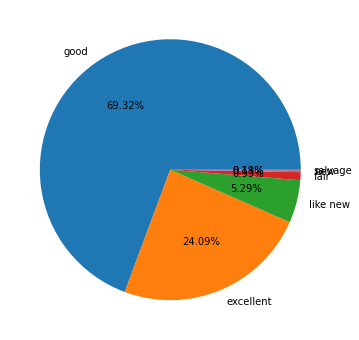

In [101]:
## Pie Chart for condition column

plt.figure(figsize=(10,6))
plt.pie(df.condition.value_counts().values,labels=df.condition.value_counts().index,autopct='%1.2f%%')
plt.show()

In [102]:
# title_status looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['condition'] = LabelEncoding.fit_transform(df['condition'])

**cylinder**

In [103]:
df['cylinders'].isnull().sum()

141037

In [104]:
df['cylinders'].value_counts()

6 cylinders     78942
4 cylinders     66429
8 cylinders     51496
5 cylinders      1432
10 cylinders      960
other             751
3 cylinders       458
12 cylinders      106
Name: cylinders, dtype: int64

In [105]:
# splitting the cylinder column

df['cylinders'] = df['cylinders'].str.split(' ').str[0]

In [106]:
# filling null values

df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mode()[0])

In [107]:
# replacing others value in cylinder column with 0
df['cylinders'] = df['cylinders'].replace(['other'],'0')


In [108]:
# changing into integer column

df['cylinders'] = df['cylinders'].astype('int')

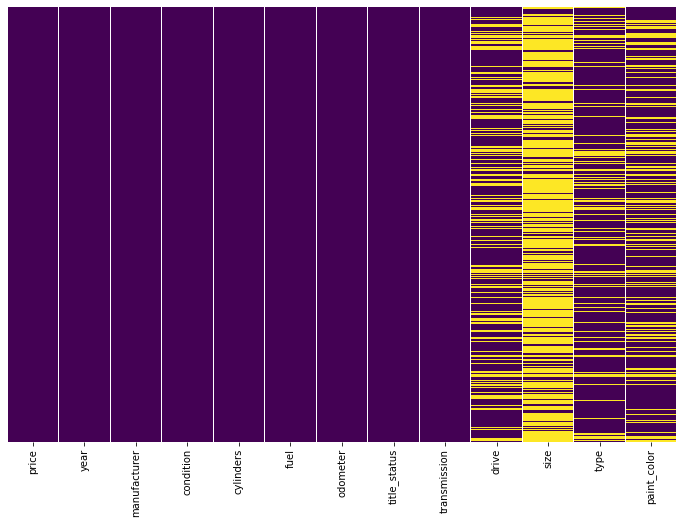

In [109]:
# creating a graph to check null values

plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Text(0, 0.5, 'Features')

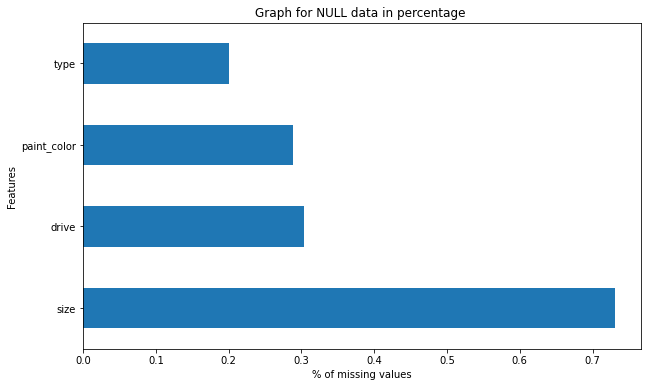

In [110]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 

# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

**drive** 

In [111]:
df['drive'].isnull().sum()

103655

In [112]:
df['drive'].value_counts()

4wd    103971
fwd     90490
rwd     43495
Name: drive, dtype: int64

In [113]:
df['drive'] = df['drive'].fillna(df['drive'].mode()[0])

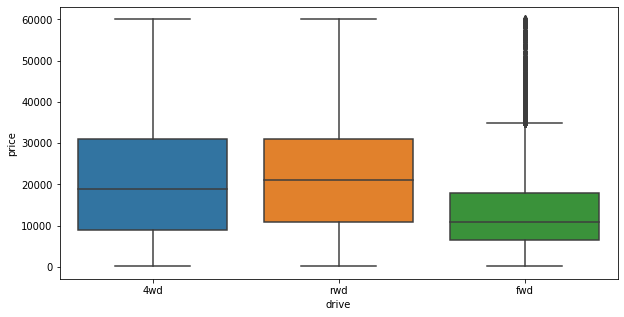

In [114]:
plt.figure(figsize=(10,5))
sns.boxplot(x="drive", y="price", data=df)

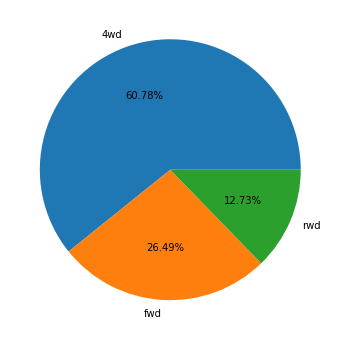

In [115]:
## Pie Chart for drive column

plt.figure(figsize=(10,6))
plt.pie(df.drive.value_counts().values,labels=df.drive.value_counts().index,autopct='%1.2f%%')
plt.show()

In [116]:
# title_status looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['drive'] = LabelEncoding.fit_transform(df['drive'])

**type**

In [117]:
df['type'].isnull().sum()

68278

In [118]:
df['type'].value_counts()

sedan          74668
SUV            63888
pickup         35661
truck          24287
other          18294
hatchback      15131
coupe          14949
wagon           9222
van             6826
convertible     5706
mini-van        3980
bus              365
offroad          356
Name: type, dtype: int64

In [119]:
df['type'] = df['type'].fillna(df['type'].mode()[0])

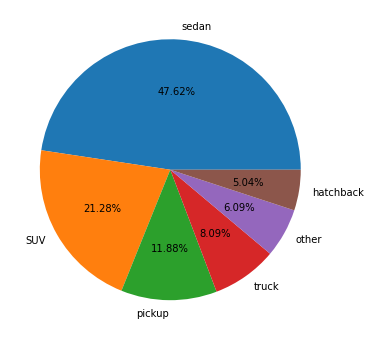

In [120]:
## Pie Chart for top 6 type column

plt.figure(figsize=(10,6))
plt.pie(df['type'].value_counts().values[:6],labels=df['type'].value_counts().index[:6],autopct='%1.2f%%')
plt.show()

In [121]:

# title_status looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['type'] = LabelEncoding.fit_transform(df['type'])

Text(0, 0.5, 'Features')

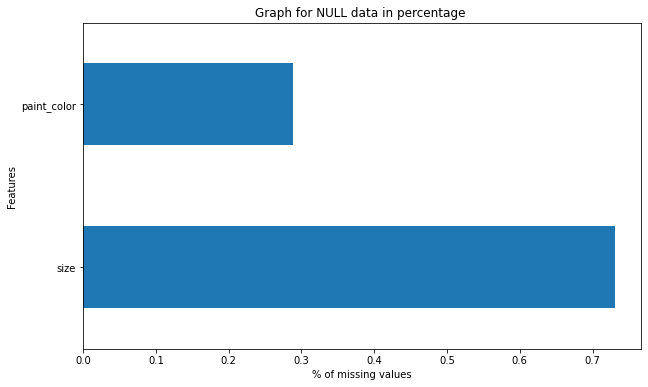

In [122]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 

# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

Size column contains about 70 percent of the Null values, dropping this column for now

In [123]:
# size column drop

df.drop('size' , axis =1 , inplace = True)

**paint_color**         

In [124]:
df['paint_color'].isnull().sum()

98374

In [125]:
df['paint_color'].value_counts()

white     63586
black     53033
silver    36666
blue      25594
red       24748
grey      20356
green      5297
custom     5268
brown      5245
orange     1510
yellow     1420
purple      514
Name: paint_color, dtype: int64

In [126]:
df['paint_color'] = df['paint_color'].fillna(df['paint_color'].mode()[0])

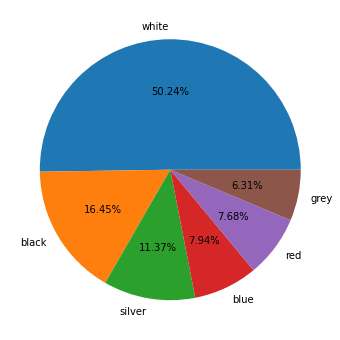

In [127]:
## Pie Chart for top 6 paint_color column

plt.figure(figsize=(10,6))
plt.pie(df['paint_color'].value_counts().values[:6],labels=df['paint_color'].value_counts().index[:6],autopct='%1.2f%%')
plt.show()

In [128]:
# title_status looks like an Ordinal data . Here will use Label Encoding

from sklearn import preprocessing

LabelEncoding = preprocessing.LabelEncoder()

df['paint_color'] = LabelEncoding.fit_transform(df['paint_color'])

In [129]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df)
missing_percentages

price           0.0
year            0.0
manufacturer    0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
dtype: float64

In [130]:
X_data = df.drop('price',axis =1 )
y_data = df['price']

In [131]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [132]:
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(273288, 11) (273288,)
(68323, 11) (68323,)


In [133]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [134]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [135]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE
import numpy as np

n_est = [10,20,30,40,50,60,70,80,90,100]
for i in n_est:
  regressor = RandomForestRegressor(n_estimators=i, random_state=42)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  print('n_estimators:',i)
  print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
  print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
  print('Root Mean Squared Error:' , round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

n_estimators: 10
Mean Absolute Error: 2224.09
Mean Squared Error: 22119386.99
Root Mean Squared Error: 4703.13
n_estimators: 20
Mean Absolute Error: 2167.46
Mean Squared Error: 21184423.98
Root Mean Squared Error: 4602.65
n_estimators: 30
Mean Absolute Error: 2145.86
Mean Squared Error: 20852630.19
Root Mean Squared Error: 4566.47
n_estimators: 40
Mean Absolute Error: 2134.15
Mean Squared Error: 20690348.82
Root Mean Squared Error: 4548.66
n_estimators: 50
Mean Absolute Error: 2128.42
Mean Squared Error: 20605717.52
Root Mean Squared Error: 4539.35
n_estimators: 60
Mean Absolute Error: 2124.07
Mean Squared Error: 20532643.12
Root Mean Squared Error: 4531.3
n_estimators: 70
Mean Absolute Error: 2119.98
Mean Squared Error: 20452215.4
Root Mean Squared Error: 4522.41
n_estimators: 80
Mean Absolute Error: 2116.97
Mean Squared Error: 20395593.12
Root Mean Squared Error: 4516.15
n_estimators: 90
Mean Absolute Error: 2115.67
Mean Squared Error: 20374036.45
Root Mean Squared Error: 4513.76
n_e

In [136]:
regressor.score(X_test,y_test)

0.8784649231893581

In [137]:
# Multiple Linear Regression

from sklearn.linear_model import LinearRegression

Multi_Linear_model = LinearRegression()
Multi_Linear_model.fit(X_train, y_train)
y_pred = Multi_Linear_model.predict(X_test)


In [138]:
from sklearn.metrics import accuracy_score
#accuracy_score(y_test,y_pred)
Multi_Linear_model.score(X_test,y_test)

0.5369479343200012

In [139]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 6489.38
Mean Squared Error: 77524222.51
Root Mean Squared Error: 8804.78


In [140]:
  regressor = RandomForestRegressor(n_estimators=300, random_state=42)
  regressor.fit(X_train, y_train)
  y_pred = regressor.predict(X_test)
  print('n_estimators:',i)
  print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
  print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
  print('Root Mean Squared Error:' , round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

n_estimators: 100
Mean Absolute Error: 2102.0
Mean Squared Error: 20169880.59
Root Mean Squared Error: 4491.09


In [141]:
regressor.score(X_test,y_test)

0.8795253332237268